In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
Product_Identifier                4990 non-null object
Supermarket_Identifier            4990 non-null object
Product_Supermarket_Identifier    4990 non-null object
Product_Weight                    4188 non-null float64
Product_Fat_Content               4990 non-null object
Product_Shelf_Visibility          4990 non-null float64
Product_Type                      4990 non-null object
Product_Price                     4990 non-null float64
Supermarket_Opening_Year          4990 non-null int64
Supermarket _Size                 3540 non-null object
Supermarket_Location_Type         4990 non-null object
Supermarket_Type                  4990 non-null object
Product_Supermarket_Sales         4990 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [5]:
df =df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [18]:
cats = df.select_dtypes(include=['object']).copy()

In [19]:
cats.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Fat_Content,Product_Type,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,Low Fat,Soft Drinks,Medium,Cluster 3,Grocery Store
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,Low Fat,Soft Drinks,High,Cluster 3,Supermarket Type1
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,Low Fat,Soft Drinks,Medium,Cluster 2,Supermarket Type1
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,Low Fat,Soft Drinks,Medium,Cluster 3,Supermarket Type2
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,Ultra Low fat,Soft Drinks,Small,Cluster 2,Supermarket Type1


In [20]:
t = cats.columns
for col in t:
    cats[col] = cats[col].astype('category')

In [21]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 8 columns):
Product_Identifier                4990 non-null category
Supermarket_Identifier            4990 non-null category
Product_Supermarket_Identifier    4990 non-null category
Product_Fat_Content               4990 non-null category
Product_Type                      4990 non-null category
Supermarket _Size                 4990 non-null category
Supermarket_Location_Type         4990 non-null category
Supermarket_Type                  4990 non-null category
dtypes: category(8)
memory usage: 300.8 KB


In [22]:
df2 = df.copy()

In [23]:
df2.drop(t,axis=1,inplace = True)

In [25]:
cats.drop('Product_Identifier',axis=1,inplace=True)

In [35]:
t = cats.columns

In [36]:
cats = pd.get_dummies(cats, columns=t, prefix = t)

In [38]:
cats.head()

,Supermarket_Identifier_CHUKWUDI010,Supermarket_Identifier_CHUKWUDI013,Supermarket_Identifier_CHUKWUDI017,Supermarket_Identifier_CHUKWUDI018,Supermarket_Identifier_CHUKWUDI019,Supermarket_Identifier_CHUKWUDI027,Supermarket_Identifier_CHUKWUDI035,Supermarket_Identifier_CHUKWUDI045,Supermarket_Identifier_CHUKWUDI046,Supermarket_Identifier_CHUKWUDI049,...,Supermarket _Size_High,Supermarket _Size_Medium,Supermarket _Size_Small,Supermarket_Location_Type_Cluster 1,Supermarket_Location_Type_Cluster 2,Supermarket_Location_Type_Cluster 3,Supermarket_Type_Grocery Store,Supermarket_Type_Supermarket Type1,Supermarket_Type_Supermarket Type2,Supermarket_Type_Supermarket Type3
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [72]:
dataset = pd.concat([df2,cats], axis=1)

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
data = pd.DataFrame(scaled_data, columns=dataset.columns.values)

C:\Users\JO5H\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [79]:
data

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales,Supermarket_Identifier_CHUKWUDI010,Supermarket_Identifier_CHUKWUDI013,Supermarket_Identifier_CHUKWUDI017,Supermarket_Identifier_CHUKWUDI018,Supermarket_Identifier_CHUKWUDI019,...,Supermarket _Size_High,Supermarket _Size_Medium,Supermarket _Size_Small,Supermarket_Location_Type_Cluster 1,Supermarket_Location_Type_Cluster 2,Supermarket_Location_Type_Cluster 3,Supermarket_Type_Grocery Store,Supermarket_Type_Supermarket Type1,Supermarket_Type_Supermarket Type2,Supermarket_Type_Supermarket Type3
0,0.419470,0.208700,0.473772,0.541667,0.019178,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.419470,0.124583,0.470798,0.083333,0.193002,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.419470,0.125392,0.462302,0.916667,0.193002,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.419470,0.125194,0.469524,1.000000,0.062634,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.419470,0.000000,0.469099,0.791667,0.073498,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,0.419470,0.000000,0.467824,0.708333,0.290778,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,0.880917,0.203513,0.562439,0.541667,0.022544,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,0.880917,0.121486,0.556492,0.083333,0.336224,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,0.880917,0.122275,0.565838,0.916667,0.085280,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,0.452218,0.212884,0.559891,0.000000,0.035091,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [80]:
x = data.drop('Product_Supermarket_Sales',axis=1)
y = data['Product_Supermarket_Sales']

In [81]:
from sklearn.model_selection import train_test_split as tts

In [82]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [83]:
x_train, x_test, y_train , y_test = tts(x,y,test_size=0.30, random_state = 42)

In [84]:
model = Sequential()
model.add(Dense(12, input_dim=5033, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                60408     
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 60,521
Trainable params: 60,521
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [86]:
history = model.fit(x_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Train on 2794 samples, validate on 699 samples
Epoch 1/150
2794/2794 [==============================] - 2s 561us/sample - loss: 0.0426 - mean_squared_error: 0.0426 - mean_absolute_error: 0.1548 - val_loss: 0.0224 - val_mean_squared_error: 0.0224 - val_mean_absolute_error: 0.1056

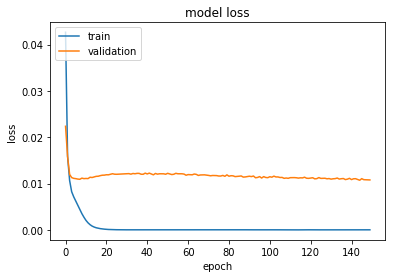

In [99]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

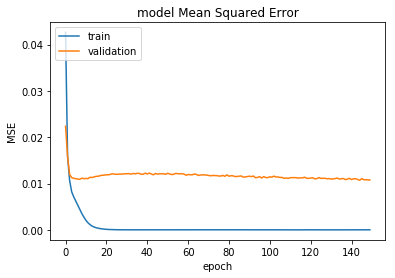

In [101]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [88]:
print(history.history.keys())

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


In [98]:
print(history.history['mean_squared_error'][148])

5.004904e-05


In [90]:
from sklearn.linear_model import LinearRegression as lr #import linear regression

In [91]:
lm = lr()

In [92]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [93]:
y_pred = lm.predict(x_test)

In [94]:
from sklearn.metrics import mean_squared_error as mse

In [95]:
mse(y_test,y_pred)

0.008457262975103033

In [97]:
0.0000476

4.76e-05

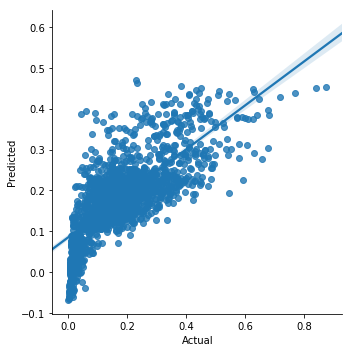

In [104]:
sns.lmplot('Actual','Predicted', pd.DataFrame(list(zip(y_test,y_pred)),columns=['Actual','Predicted']))

In [ ]:
sns.barplot(x=)